In [11]:
import numpy as np
import pandas as pd
import visuals as vs

data = pd.read_csv('bj_housing.csv')
prices = data['Value']
features = data.drop('Value', axis=1)
data.head()

,Area,Value,Room,Living,School,Year,Floor
0,128,370,3,1,1,2004,21
1,68,330,1,2,1,2000,6
2,125,355,3,2,0,2003,5
3,129,278,2,2,0,2005,16
4,118,340,3,2,0,2003,6


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
        features, prices, test_size=0.2, random_state=10)

def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_predict, y_true)
    return score

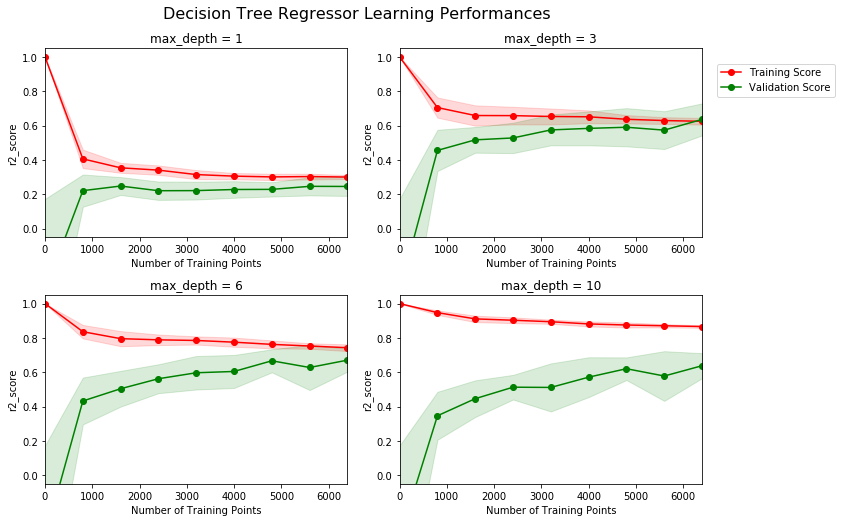

In [13]:
vs.ModelLearning(X_train, y_train)

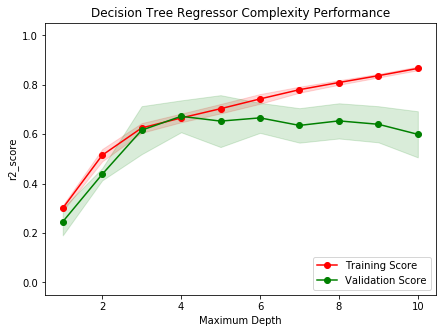

In [14]:
vs.ModelComplexity(X_train, y_train)

In [17]:
def fit_model(X, y):
    from sklearn.model_selection import KFold
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import GridSearchCV
    
    cross_validator = KFold()
    regressor = DecisionTreeRegressor()
    params = {'max_depth': np.arange(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cross_validator)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [18]:
optimal_reg = fit_model(X_train, y_train)
print optimal_reg.get_params()['max_depth']

10


In [20]:
test_predicted = optimal_reg.predict(X_test)

r2 = performance_metric(y_test, test_predicted)
print "r2:", r2

r2: 0.546380092518
